project outline:
1. text cleaning
2. visualization
3. tokenization
4. vectoring
5. multi label classificatio nusing logictic regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import zipfile
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

In [ ]:


val= pd.read_csv('../content/drive/MyDrive/jigsaw-toxic-severity-rating/validation_data.csv')
train_csv_zip_path = '..//content/drive/MyDrive/jigsaw-toxic-comment-classification-challenge/train.csv.zip'
with zipfile.ZipFile(train_csv_zip_path,'r') as zf:
    zf.extractall('./')
train_csv_path = './train.csv'
sample_sub_path = '../content/drive/MyDrive/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip'
comments_to_score_path = '../content/drive/MyDrive/jigsaw-toxic-severity-rating/comments_to_score.csv'
val_path='../content/drive/MyDrive/jigsaw-toxic-severity-rating/validation_data.csv'
df_train = pd.read_csv("./train.csv")
df_train1 = pd.read_csv("./train.csv")
df_test= pd.read_csv("/content/drive/MyDrive/jigsaw-toxic-comment-classification-challenge/test.csv.zip")
df_sub = pd.read_csv("../content/drive/MyDrive/jigsaw-toxic-severity-rating/comments_to_score.csv")

In [ ]:
df_train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [ ]:
val

,worker,less_toxic,more_toxic
0,313,This article sucks \n\nwoo woo wooooooo,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...
1,188,"""And yes, people should recognize that but the...",Daphne Guinness \n\nTop of the mornin' my fav...
2,82,"Western Media?\n\nYup, because every crime in...","""Atom you don't believe actual photos of mastu..."
3,347,And you removed it! You numbskull! I don't car...,You seem to have sand in your vagina.\n\nMight...
4,539,smelly vagina \n\nBluerasberry why don't you ...,"hey \n\nway to support nazis, you racist"
...,...,...,...
30103,461,I'm sorry. I'm not an admin. I will give you t...,get out my large penis
30104,527,I'm sorry. I'm not an admin. I will give you t...,get out my large penis
30105,352,"wow...\nare you out of your mind, how was my e...",Piss off you slant eyed-gook
30106,311,"wow...\nare you out of your mind, how was my e...",Piss off you slant eyed-gook


In [ ]:
val.head()

,worker,less_toxic,more_toxic
0,313,This article sucks \n\nwoo woo wooooooo,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...
1,188,"""And yes, people should recognize that but the...",Daphne Guinness \n\nTop of the mornin' my fav...
2,82,"Western Media?\n\nYup, because every crime in...","""Atom you don't believe actual photos of mastu..."
3,347,And you removed it! You numbskull! I don't car...,You seem to have sand in your vagina.\n\nMight...
4,539,smelly vagina \n\nBluerasberry why don't you ...,"hey \n\nway to support nazis, you racist"


In [ ]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
# Clean Text
def clean_text(text):
#replace the html characters with " "
    text=re.sub('<.*?>', ' ', text)
#remove the punctuations
    text = text.translate(str.maketrans(' ',' ',string.punctuation))
#consider only alphabets and numerics
    text = re.sub('[^a-zA-Z]',' ',text)
#replace newline with space
    text = re.sub("\n"," ",text)
#convert to lower case
    text = text.lower()
#split and join the words
    text=' '.join(text.split())
    return text

def stopwords(input_text, stop_words):
    word_tokens = word_tokenize(input_text)
    output_text = [w for w in word_tokens if not w in stop_words]
    output = []
    for w in word_tokens:
        if w not in stop_words:
            output.append(w)

    text = ' '.join(output)
    return text

In [ ]:
unrelevant_words = ['wiki','wikipedia','page']
def clean(data,word):
    #Clean step 1, 2 and 3
    data[word] = data[word].apply(lambda x: ''.join([w for w in clean_text(x) if w not in unrelevant_words]))
    #Clean Step 4
    data[word] = data[word].apply(lambda x: ''.join([w for w in stopwords(x,stop_words)]))
    #Clean Step 5
    data[word] = data[word].apply(lambda x: ''.join([w for w in lemmatizer.lemmatize(x)]))

In [ ]:
# Clean Comment Text
clean(df_train,"comment_text")
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww matches background colour im seemingly st...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0


In [ ]:
clean(val,"less_toxic")
clean(val,"more_toxic")
val.head()

,worker,less_toxic,more_toxic
0,313,article sucks woo woo wooooooo,wher sexy pic gone main page put back
1,188,yes people recognize usually dont one first ob...,daphne guinness top mornin favourite alien lif...
2,82,western media yup every crime entire world cau...,atom dont believe actual photos masturbation s...
3,347,removed numbskull dont care say anymore life g...,seem sand vagina might want wash stinking hole...
4,539,smelly vagina bluerasberry dont model cheesy b...,hey way support nazis racist


In [ ]:
clean(df_test,"comment_text")


In [ ]:
unlabelled_in_all = df_train[(df_train['toxic']!=1) & (df_train['severe_toxic']!=1) & (df_train['obscene']!=1) &
                            (df_train['threat']!=1) & (df_train['insult']!=1) & (df_train['identity_hate']!=1)]
print('unlabelled documents: ', len(unlabelled_in_all)/len(df_train)*100)

unlabelled documents:  89.83211235124176


In [ ]:
#check if theres no comment on train data
no_comment = df_train[df_train['comment_text'].isnull()]
len(no_comment)

0

In [ ]:
no_comment = df_train[df_train['comment_text'].isnull()]
no_comment

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [ ]:
print('Test =  {}'.format(len(df_test)))
print('Train =  {}'.format(len(df_train)))
print(df_train[cols_target].sum())

Test =  153164
Train =  159571
obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


In [ ]:
df_train['char_length'] = df_train['comment_text'].apply(lambda x: len(str(x)))

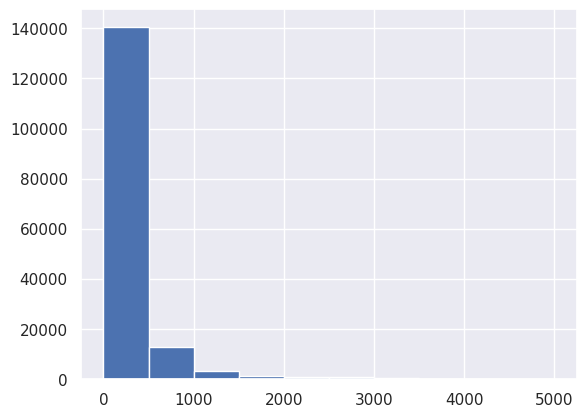

In [ ]:
sns.set()
df_train['char_length'].hist()
plt.show()

In [ ]:
df_test['char_length'] = df_test['comment_text'].apply(lambda x: len(str(x)))

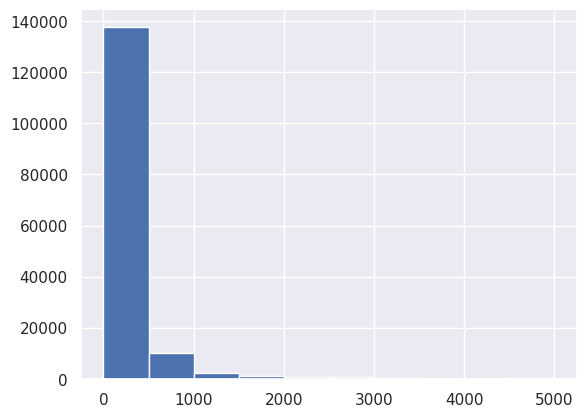

In [ ]:
plt.figure()
plt.hist(df_test['char_length'])
plt.show()

In [ ]:
df_train = df_train.drop('char_length',axis=1)

In [ ]:
X = df_train.comment_text
test_X = df_test.comment_text


In [ ]:
y = df_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

In [ ]:
y =  df_train.drop(['id','comment_text'],axis = 1)

In [ ]:
y

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_val, y_train,y_val= train_test_split(X,y,test_size=0.2, random_state=1)

In [ ]:
print(X.shape, test_X.shape)

(159571,) (153164,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect

TfidfVectorizer(max_features=5000, stop_words='english')

In [ ]:
X_dtm = vect.fit_transform(X_train)
X_dtm

<127656x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2421251 stored elements in Compressed Sparse Row format>

In [ ]:
test_X_dtm = vect.transform(X_val)
test_X_dtm.shape

(31915, 5000)

In [ ]:
X_dtm.shape

(127656, 5000)

LOGISTIC REGRESSION :
 - BINARY RELEVANCE

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, hamming_loss, f1_score
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression(C=0.5)
multi_logreg = MultiOutputClassifier(logreg)

multi_logreg.fit(X_dtm, y_train)
y_pred_X = multi_logreg.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_X)))


Training accuracy is 0.9201682647114119


In [ ]:
#testing

y_pred_proba_X = multi_logreg.predict_proba(test_X_dtm)
y_pred_test_X = multi_logreg.predict(test_X_dtm)

hamming_loss_val = hamming_loss(y_val, y_pred_test_X)
print('Hamming loss is {}'.format(hamming_loss_val))

f1_score_val = f1_score(y_val, y_pred_test_X, average='micro')
print('F1 score is {}'.format(f1_score_val))

print('Val accuracy is {}'.format(accuracy_score(y_val, y_pred_test_X)))

Hamming loss is 0.020246488067261998
F1 score is 0.6537465392515852
Val accuracy is 0.9172802757324142


In [ ]:
df_test.head()

,id,comment_text,char_length,obscene,insult,toxic,severe_toxic,identity_hate,threat
0,00001cee341fdb12,yo bitch ja rule succesful youll ever whats ha...,251,0.984706,0.884649,0.991171,0.142130,0.154568,0.018608
1,0000247867823ef7,rfc title fine imo,18,0.008603,0.011405,0.015150,0.003513,0.004141,0.001896
2,00013b17ad220c46,sources zawe ashton lapland,27,0.007142,0.009761,0.017087,0.002089,0.002810,0.001106
3,00017563c3f7919a,look back source information updated correct f...,115,0.005243,0.005230,0.005834,0.002502,0.001647,0.001236
4,00017695ad8997eb,dont anonymously edit articles,30,0.009982,0.011508,0.048575,0.001586,0.002649,0.001424


LOGISTIC REGRESSION
 - One Versus Rest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, log_loss, hamming_loss, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import binarize

y_pred_proba_X = ovr.predict_proba(test_X_dtm) # Predicted probabilities for training data
threshold = 0.5  # Adjust this threshold according to your needs
y_pred_proba_X_binary = binarize(y_pred_proba_X, threshold=threshold)

logreg = LogisticRegression(C=1.0)
hamming_losses = []
log_losses = []
f1_scores = []

ovr = OneVsRestClassifier(logreg)

# Fit the OneVsRestClassifier on the training data
ovr.fit(X_dtm, y_train)

y_pred_X = ovr.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_X)))

y_pred_proba_X = ovr.predict_proba(test_X_dtm) # Predicted probabilities for training data
logloss = log_loss(y_val, y_pred_proba_X)
print('Log loss is {}'.format(logloss))

# Calculate hamming loss
hammingloss = hamming_loss(y_val, y_pred_proba_X_binary)
print('Hamming loss is {}'.format(hammingloss))

# Calculate F1 score
f1score = f1_score(y_val, y_pred_proba_X_binary, average='micro')
print('F1 score is {}'.format(f1score))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9234505232813185
Log loss is 0.2799831485968284
Hamming loss is 0.019484046164290565
F1 score is 0.6789432923156355


In [ ]:
#testing
y_pred_proba_X = ovr.predict_proba(test_X_dtm)
y_pred_test_X = ovr.predict(test_X_dtm)

hamming_loss_val = hamming_loss(y_val, y_pred_test_X)
print('Hamming loss is {}'.format(hamming_loss_val))

f1_score_val = f1_score(y_val, y_pred_test_X, average='micro')
print('F1 score is {}'.format(f1_score_val))

print('Val accuracy is {}'.format(accuracy_score(y_val, y_pred_test_X)))

Hamming loss is 0.019484046164290565
F1 score is 0.6789432923156355
Val accuracy is 0.9184082719724268


In [ ]:
df_test.head()

,id,comment_text,char_length
0,00001cee341fdb12,yo bitch ja rule succesful youll ever whats ha...,251
1,0000247867823ef7,rfc title fine imo,18
2,00013b17ad220c46,sources zawe ashton lapland,27
3,00017563c3f7919a,look back source information updated correct f...,115
4,00017695ad8997eb,dont anonymously edit articles,30


In [ ]:
!pip install scikit-multilearn
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 4.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


TO DO LIST :
2. MAKE 2 NEW MODEL (classifier algorithms)
https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff
multinominalNB

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Neural Network (Multi-layer Perceptron classifier)

-Binary Relevance



In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300)

clf.fit(X_dtm, y_train)
y_pred_X = clf.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_X)))

Training accuracy is 0.9943363414175597


In [ ]:
# compute the predicted probabilities for X_test_dtm on df_test file (testing)
test_y_prob = clf.predict_proba(test_X_dtm)

#testing
y_pred_proba_X = clf.predict_proba(test_X_dtm)
y_pred_test_X = clf.predict(test_X_dtm)

hamming_loss_val = hamming_loss(y_val, y_pred_test_X)
print('Hamming loss is {}'.format(hamming_loss_val))

f1_score_val = f1_score(y_val, y_pred_test_X, average='micro')
print('F1 score is {}'.format(f1_score_val))

print('Val accuracy is {}'.format(accuracy_score(y_val, y_pred_test_X)))

Hamming loss is 0.022653924486918376
F1 score is 0.6804655274012964
Val accuracy is 0.9004856650477832


NN

One Vs Rest

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
clf = MLPClassifier(random_state=1, max_iter=300)

ovr = OneVsRestClassifier(clf)
ovr.fit(X_dtm, y_train)
y_pred_X = ovr.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_X)))

Training accuracy is 0.9939603308892649


In [ ]:
# compute the predicted probabilities for X_test_dtm on df_test file (testing)
test_y_prob = ovr.predict_proba(test_X_dtm)

#testing
y_pred_proba_X = ovr.predict_proba(test_X_dtm)
y_pred_test_X = ovr.predict(test_X_dtm)

hamming_loss_val = hamming_loss(y_val, y_pred_test_X)
print('Hamming loss is {}'.format(hamming_loss_val))

f1_score_val = f1_score(y_val, y_pred_test_X, average='micro')
print('F1 score is {}'.format(f1_score_val))

print('Val accuracy is {}'.format(accuracy_score(y_val, y_pred_test_X)))

Hamming loss is 0.022210037077654187
F1 score is 0.6822562570041091
Val accuracy is 0.9016763277455742


Decision Tree Classifier


-Binary Relevance

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_dtm, y_train)
y_pred_X = clf.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_X)))

Training accuracy is 0.9951666980008773


In [ ]:

#testing
y_pred_proba_X = clf.predict_proba(test_X_dtm)
y_pred_test_X = clf.predict(test_X_dtm)

hamming_loss_val = hamming_loss(y_val, y_pred_test_X)
print('Hamming loss is {}'.format(hamming_loss_val))

f1_score_val = f1_score(y_val, y_pred_test_X, average='micro')
print('F1 score is {}'.format(f1_score_val))

print('Val accuracy is {}'.format(accuracy_score(y_val, y_pred_test_X)))

Hamming loss is 0.025667136665100006
F1 score is 0.6325233644859815
Val accuracy is 0.8966003446655177


Decision Tree

-One Vs Rest

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

ovr = OneVsRestClassifier(clf)
ovr.fit(X_dtm, y_train)
y_pred_X = ovr.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_X)))

Training accuracy is 0.9951666980008773


In [ ]:

#testing
y_pred_proba_X = ovr.predict_proba(test_X_dtm)
y_pred_test_X = ovr.predict(test_X_dtm)

hamming_loss_val = hamming_loss(y_val, y_pred_test_X)
print('Hamming loss is {}'.format(hamming_loss_val))

f1_score_val = f1_score(y_val, y_pred_test_X, average='micro')
print('F1 score is {}'.format(f1_score_val))

print('Val accuracy is {}'.format(accuracy_score(y_val, y_pred_test_X)))

Hamming loss is 0.024800250665831115
F1 score is 0.6494426810363919
Val accuracy is 0.8928716904276985


Extra Tree Classifier
- Binary Relevance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)

clf.fit(X_dtm, y_train)
y_pred_X = clf.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_X)))


Training accuracy is 0.9951666980008773


In [ ]:

#testing
y_pred_proba_X = clf.predict_proba(test_X_dtm)
y_pred_test_X = clf.predict(test_X_dtm)

hamming_loss_val = hamming_loss(y_val, y_pred_test_X)
print('Hamming loss is {}'.format(hamming_loss_val))

f1_score_val = f1_score(y_val, y_pred_test_X, average='micro')
print('F1 score is {}'.format(f1_score_val))

print('Val accuracy is {}'.format(accuracy_score(y_val, y_pred_test_X)))

Hamming loss is 0.02008459971800094
F1 score is 0.6834567901234567
Val accuracy is 0.9143036189879367


Extra Tree OVR

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)

ovr = OneVsRestClassifier(clf)
ovr.fit(X_dtm, y_train)
y_pred_X = ovr.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_X)))

Training accuracy is 0.9951666980008773


In [ ]:

#testing
y_pred_proba_X = ovr.predict_proba(test_X_dtm)
y_pred_test_X = ovr.predict(test_X_dtm)

hamming_loss_val = hamming_loss(y_val, y_pred_test_X)
print('Hamming loss is {}'.format(hamming_loss_val))

f1_score_val = f1_score(y_val, y_pred_test_X, average='micro')
print('F1 score is {}'.format(f1_score_val))

print('Val accuracy is {}'.format(accuracy_score(y_val, y_pred_test_X)))

Hamming loss is 0.020053266489111703
F1 score is 0.6846772869108229
Val accuracy is 0.9138962870123766


https://medium.com/technovators/machine-learning-based-multi-label-text-classification-9a0e17f88bb4
https://scikit-learn.org/stable/modules/multiclass.html